In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
import random
import pandas as pd

In [48]:
from IPython.core.display import display, HTML
display(HTML("<font color='green'>Дано:</font>"))
display(HTML("<font color='green'>A = 1</font>"))
display(HTML("<font color='green'>D = 2</font>"))
display(HTML("<font color='green'>n = 500</font>"))
display(HTML("<font color='green'>Пусть m = 10000</font>"))
n = 500
m = 10000

In [49]:
data = []
for j in range(m):
    items = [np.sqrt(random.random()) for i in range(n)]
    data.append(items)

0.097    16
0.203    13
0.310    26
0.416    43
0.522    51
0.628    68
0.734    86
0.840    92
0.947   105


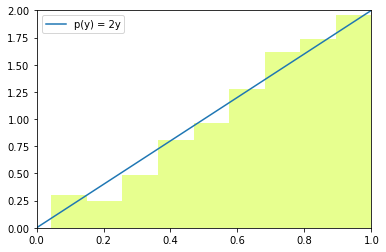

0.6814191094435373
0.053202801312699104
0.05330942015300512


In [50]:
#Группировка
min_member = min(data[0])
max_member = max(data[0])
display(HTML("<font color='green'>Гистограмма относительных частот</font>"))
selection_range = max_member - min_member
l = math.trunc(1 + 3.32*math.log(n, 10))
interval_length = selection_range / l
hist = np.histogram(data[0], l)
hist_center = [0] * l
for i in range (0, l):
    hist_center[i] = hist[1][i] + interval_length / 2
    print("%-7.3f %3d" % (hist[1][i] + interval_length / 2, hist[0][i]))
#display(HTML("<font color='green'>Относительные частоты</font>"))
rel_frequency = [0] * l
for i in range (0, l):
    rel_frequency[i] = hist[0][i] / n
    #print(rel_frequency[i])
#display(HTML("<font color='green'>Высоты столбцов гистограммы</font>"))
hist_hight = [0] * l
for i in range (0, l): 
    hist_hight[i] = rel_frequency[i] / interval_length
    #print("%5.5f" % (hist_hight[i]))
#display(HTML("<font color='green'>Границы интервалов</font>"))
borders = [0] * l
for i in range (0, l): 
    borders[i] = hist[1][i] + interval_length
    #print("%5.5f" % (borders[i]))
display(HTML("<font color='green'>Гистограмма</font>"))
plt.hist(data[0], 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F"
        )
y = np.linspace (0, 1, 100) 
plt.plot (y, 2 * y, label = "p(y) = 2y")
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.legend()
plt.show()
display(HTML("<font color='green'>Получим аналогичный результат, используя формулу p_этта(y) = p_кси(g^-1(y))|(g^-1(y))'|</font>"))
display(HTML("<font color='green'>p_этта(y) = 2y / (b - a), т.к. R[0, 1], в итоге p_этта(y) = 2y</font>"))
display(HTML("<font color='green'>Выборочное среднее и выборочная дисперсия</font>"))
sample_mean = np.mean(data[0])
print(sample_mean)
sample_variance_shift = np.var(data[0]) #смещённая дисперсия
print(sample_variance_shift)
sum = 0
for i in data[0]:
    sum += (i - sample_mean) ** 2
sample_variance = sum / (n - 1) #несмещённая дисперсия
print(sample_variance)

   Имперические частоты  Теоретические частоты
0                    16               6.172840
1                    13              18.518519
2                    26              30.864198
3                    43              43.209877
4                    51              55.555556
5                    68              67.901235
6                    86              80.246914
7                    92              92.592593
8                   105             104.938272


[7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06, 7.620789513795231e-06] ...


Dкр(0.1) =  0.5080570035055628
Dкр(0.05) =  0.717316262764822
Dкр(0.01) =  1.2438347812833404


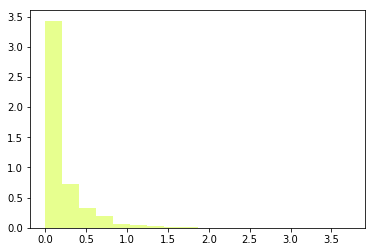

In [51]:
display(HTML("<font color='green'>Чтобы найти плотность вероятности на каждом секторе, необходимо разбить этот треугольник на l = 9 частей и найти площади этих секторов.</font>"))
p = []
p_=[]
for i in range (1, l + 1):
    p.append(((i - 1) / l + i / l) * (1 / l))
    p_.append(n * ((i - 1) / l + i / l) * (1 / l))
display(HTML("<font color='green'>Теперь найдём значение метрики: D2(n,l) = 1/n*sum(|vj-npj|)</font>"))
frequency = pd.DataFrame({'Имперические частоты': hist[0],
                          'Теоретические частоты': p_})
print(frequency)
display(HTML("<font color='green'>Для m выборок:</font>"))
frequency_1 = []
D = []
for i in range (m):
    hist_1 = np.histogram(data[i], l)
    frequency_1 += [hist_1[0]]
for i in range(m):
    for j in range(l):
        z = 0
        z += (frequency_1[i][j] - p_[j]) ** 2
        d = (1 / n) * z
    D.append(d)
display(HTML("<font color='green'>Отсортируем D по возрастанию:</font>"))
print(sorted(D)[:10], "...")
display(HTML("<font color='green'>Вычислим критические значения Dкр для трёх уровней значимости alpha = 0.1, 0.05, 0.01:</font>"))
print("Dкр(0.1) = ", sorted(D)[int(m - m * 0.1)])
print("Dкр(0.05) = ", sorted(D)[int(m - m * 0.05)])
print("Dкр(0.01) = ", sorted(D)[int(m - m * 0.01)])
display(HTML("<font color='green'>Построим гистограмму распределения D:</font>"))
min_member = min(D)
max_member = max(D)
selection_range = max_member - min_member
l_d = math.trunc(1 + 3.32*math.log(m, 10))
interval_length = selection_range / l_d
hist = np.histogram(D, l_d)

display(HTML("<font color='green'>Гистограмма</font>"))
plt.hist(D, 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F")
plt.show()

7.620789513795231e-06


Dкр(0.1) =  0.5080570035055628
Dкр(0.05) =  0.717316262764822
Dкр(0.01) =  1.2438347812833404


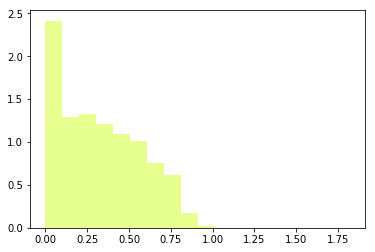

22.024081694863586


Dкр(0.1) =  0.5080570035055628
Dкр(0.05) =  0.717316262764822
Dкр(0.01) =  1.2438347812833404


In [53]:
display(HTML("<font color='green'>Протестируем критерий</font>"))
display(HTML("<font color='green'>D1 = </font>"))
print(D[0])
display(HTML("<font color='green'>Dкр:</font>"))
print("Dкр(0.1) = ", sorted(D)[int(m - m * 0.1)])
print("Dкр(0.05) = ", sorted(D)[int(m - m * 0.05)])
print("Dкр(0.01) = ", sorted(D)[int(m - m * 0.01)])
display(HTML("<font color='green'>D1 < Dкр => гипотеза A = 1 принимается. Критерий сработал верно!</font>"))
display(HTML("<font color='green'>Теперь протестируем критерий для выборки, полученной из закона бета-распределения с параметрами 1, 2</font>"))
betta = [scipy.stats.beta.rvs(1, 2, 0) for i in range(n)]
min_member = min(betta)
max_member = max(betta)
selection_range = max_member - min_member
l_b = math.trunc(1 + 3.32*math.log(n, 10))
interval_length = selection_range / l_b
hist = np.histogram(betta, l_b)

display(HTML("<font color='green'>Гистограмма</font>"))
plt.hist(betta, 
         bins = np.arange(min_member, max_member + 1, interval_length),
         density = True, 
         range = (min_member, max_member), 
         color = "#E7FF8F")
plt.show()
for i in range(l):
    z = 0
    z += (np.histogram(betta[i], l)[0][i] - p_[i]) ** 2
    d = (1 / n) * z
display(HTML("<font color='green'>D2 = </font>"))
print(d)
display(HTML("<font color='green'>Dкр:</font>"))
print("Dкр(0.1) = ", sorted(D)[int(m - m * 0.1)])
print("Dкр(0.05) = ", sorted(D)[int(m - m * 0.05)])
print("Dкр(0.01) = ", sorted(D)[int(m - m * 0.01)])
display(HTML("<font color='green'>D2 > Dкр => гипотеза о бета-распределении отклоняется. Критерий сработал верно!</font>"))